### Download Data

In [1]:
import pandas as pd
import numpy as np
# read data to pandas frame
url = 'https://raw.githubusercontent.com/Dr-Ning-An/Deep-Learning-with-Keras/main/AIAAJ/FixedBeamData.csv'
data = pd.read_csv(url)
data.shape
# print(data.head(5))

(5000, 4)

In [2]:
inputs = data.iloc[:, 0:2]
# Normalize the inputs
inputs_norm = (inputs - inputs.mean()) / inputs.std()
n_inputs_norm = inputs_norm.shape[1]
print(inputs_norm.head(5))
outputs = data.iloc[:, 2:4]
outputs_norm = (outputs - outputs.mean()) / outputs.std()
n_outputs_norm = outputs_norm.shape[1]
print(outputs_norm.head(5))

   Coordinate x [m]  Distributed load q [kN/m]
0         -1.455816                  -1.561807
1          0.923784                   1.380999
2          1.618613                   1.443347
3          1.435727                  -0.178383
4         -1.290942                   0.628672
   Displacement u [m]  Curvature kappa [m-1]
0            1.231600              -0.666018
1           -0.460458               0.218307
2            1.293882              -2.480789
3            1.116590              -1.089553
4            0.761128              -0.853157


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# define regression model
def ANN_model():
    # create model
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(n_inputs_norm,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_outputs_norm))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [4]:
# build the model
model = ANN_model()

In [7]:
from sklearn.model_selection import train_test_split
# Randomly split the data into a training and test sets by holding 30% of the data for testing.
inputs_norm_train, inputs_norm_test, outputs_norm_train, outputs_norm_test = train_test_split(inputs_norm, outputs_norm, test_size = 0.3, random_state=42)
# fit the model
model.fit(inputs_norm_train, outputs_norm_train, epochs=100, batch_size=30)

Epoch 1/100
117/117 [==============================] - 0s 2ms/step - loss: 1.9043e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 1.8710e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 1.9922e-04
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 1.9330e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 1.8382e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 1.8806e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 2.0604e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 1.9944e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 2.5072e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 1.8152e-04
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 2.3552e-04
Epoch 12/100
117/117 [==============================

      Displacement u [m]  Curvature kappa [m-1]
1501           -0.000018           2.189027e-06
2586           -0.000028           4.417503e-06
2653           -0.000011           1.687692e-07
1055           -0.000007          -1.228831e-06
705            -0.000024           2.719783e-06
...                  ...                    ...
3563           -0.000007           3.566781e-07
1538           -0.000005          -5.187704e-06
1837           -0.000007          -2.813252e-06
2380           -0.000016           2.080151e-07
1912           -0.000020           2.393105e-06

[1500 rows x 2 columns]
47/47 [==============================] - 0s 3ms/step
      Displacement u [m]  Curvature kappa [m-1]
0              -0.000018           2.273943e-06
1              -0.000028           4.430930e-06
2              -0.000011           2.319116e-07
3              -0.000007          -1.212303e-06
4              -0.000024           2.725641e-06
...                  ...                    ...
1495      

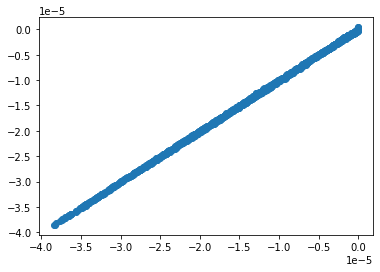

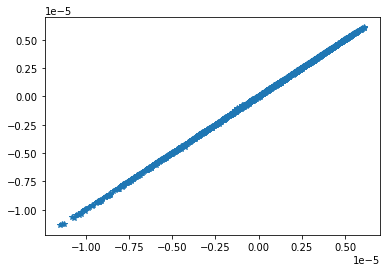

In [9]:
# Evaluate the mdoel on the test data and compare the error between predictions and true data
import matplotlib.pyplot as plt
true_data = outputs_norm_test  * outputs.std() + outputs.mean()
print(true_data)
true_data_disp = true_data.to_numpy()[:,0]
true_data_cur = true_data.to_numpy()[:,1]
pred_data = model.predict(inputs_norm_test)
pred_data_df = pd.DataFrame(pred_data, columns = ['Displacement u [m]','Curvature kappa [m-1]'])
pred_data_df = pred_data_df  * outputs.std() + outputs.mean()
print(pred_data_df)
pred_data_disp = pred_data_df.to_numpy()[:,0]
pred_data_cur = pred_data_df.to_numpy()[:,1]
plt.plot(true_data_disp, pred_data_disp, 'o')
plt.show()
plt.plot(true_data_cur, pred_data_cur, '*')
plt.show()